# Gaussian Processes (Julia)

This example demonstrates [GaussianProcesses.jl](https://github.com/STOR-i/GaussianProcesses.jl). We fit the model, tune its hyperparameters with GridSearchCV, and compute the cross-validation score.

In [1]:
using ScikitLearn
using ScikitLearn.GridSearch
using PyPlot
using GaussianProcesses: GP, MeanZero, SE

srand(42)
# Training data
n = 10
x = 2π * rand(n, 1)
y = sin(x[:, 1]) + 0.05*randn(n)

10-element Array{Float64,1}:
 -0.152869
  0.294195
  0.136808
  0.959604
 -0.236843
 -0.209638
  0.977491
  0.816858
 -0.246879
 -0.547982

Fit a GP with hand-specified parameters:

In [2]:
# Select mean and covariance function
mZero = MeanZero()                   # Zero mean function
kern = SE(0.0,0.0)                   # Squared exponential kernel with parameters
                                     # log(ℓ) = 0.0, log(σ) = 0.0
gp = fit!(GP(m=mZero,k=kern, logNoise=-1.0), x,y);

Use cross-validation to find the optimal noise level and (log) signal standard deviation σ

In [3]:
gp_cv = fit!(GridSearchCV(GP(m=mZero,k=SE(0.0,0.0)), Dict(:logNoise=>collect(-10:0.3:10), :k_lσ=>collect(0:0.1:5))), x, y);
best_gp = gp_cv.best_estimator_;
@show get_params(best_gp)[:logNoise] get_params(best_gp)[:k_lσ]
nothing

(get_params(best_gp))[:logNoise] = -3.7
(get_params(best_gp))[:k_lσ] = 0.4000000000000001


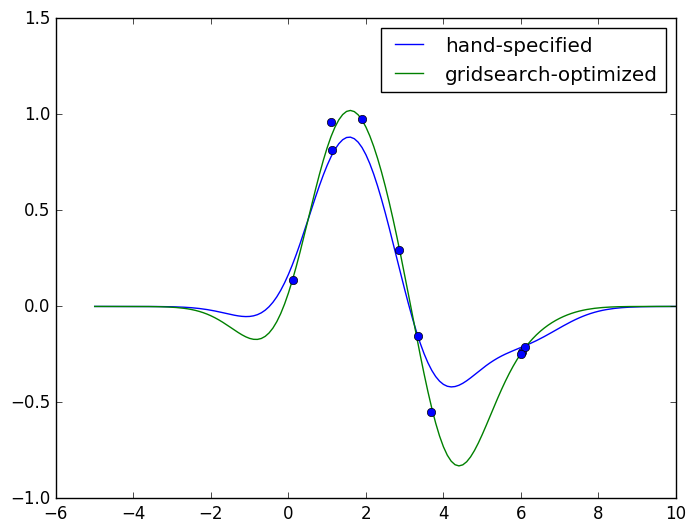

In [4]:
xx = -5:0.1:10
plot(xx, predict(gp, reshape(collect(xx), length(xx), 1)), label="hand-specified")
plot(xx, predict(best_gp, reshape(collect(xx), length(xx), 1)), label="gridsearch-optimized")
plot(x, y, "bo")
legend();

`GridSearchCV` can tune all kernel and mean parameters:

In [5]:
get_params(gp)

Dict{Symbol,Float64} with 4 entries:
  :k_ll     => 0.0
  :m_β      => 0.0
  :k_lσ     => 0.0
  :logNoise => -1.0

# Example 2 - cross-validation

In [6]:
using ScikitLearn, PyPlot
using ScikitLearn.CrossValidation: cross_val_score

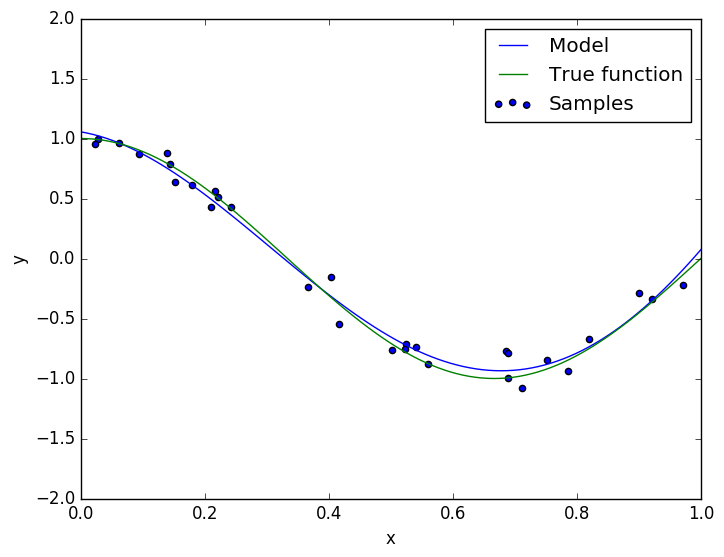

In [7]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos(1.5 * pi * X)
X = rand(n_samples)
y = true_fun(X) + randn(n_samples) * 0.1

gp = fit!(GP(logNoise=-10.0), X'', y)

X_test = linspace(0, 1, 100)
plot(X_test, predict(gp, X_test''), label="Model")
plot(X_test, true_fun(X_test), label="True function")
scatter(X, y, label="Samples")
xlabel("x")
ylabel("y")
xlim((0, 1))
ylim((-2, +2))
legend(loc="best");

Cross-validation score:

In [8]:
mean(cross_val_score(gp, X'', y, cv=10))

-0.013605985672558243